In [16]:
import lightgbm as lgb
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
simulation_data = pd.read_csv("simulation_data.csv", index_col=0)

In [18]:
simulation_data

,episode,ride_id,price,reward,eta,route_distance,route_duration,source_h3,destination_h3,month,day,hour,day_of_week,part_of_day,pickup_distance,success
0,0,919048.0,6,0.258339,3.0,4255.0,603.0,324.0,578.0,10.0,2.0,0.0,0.0,3.0,2.000000,0
1,0,1074223.0,42,0.145336,3.0,10540.0,1536.0,230.0,161.0,10.0,2.0,0.0,0.0,3.0,2.000000,0
2,0,1194102.0,1,0.125699,4.0,6279.0,831.0,320.0,615.0,10.0,2.0,0.0,0.0,3.0,2.666667,0
3,0,1721900.0,8,0.252274,4.0,2434.0,426.0,592.0,257.0,10.0,2.0,0.0,0.0,3.0,2.666667,0
4,0,1671516.0,80,0.074199,4.0,11591.0,1368.0,62.0,141.0,10.0,2.0,0.0,0.0,3.0,2.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575589,1,2026192.0,98,0.058524,7.0,7862.0,1079.0,164.0,214.0,10.0,9.0,23.0,0.0,3.0,4.666667,0
575590,1,757886.0,25,0.214639,1.0,11920.0,1722.0,322.0,35.0,10.0,9.0,23.0,0.0,3.0,0.666667,0
575591,1,161319.0,89,0.442212,2.0,3009.0,385.0,576.0,321.0,10.0,9.0,23.0,0.0,3.0,1.333333,0
575592,1,425634.0,94,0.154656,1.0,5072.0,779.0,216.0,669.0,10.0,9.0,23.0,0.0,3.0,0.666667,0


In [19]:
simulation_data = simulation_data.drop(columns=["reward"])

[LightGBM] [Info] Number of positive: 84029, number of negative: 376446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 460475, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182483 -> initscore=-1.499613
[LightGBM] [Info] Start training from score -1.499613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

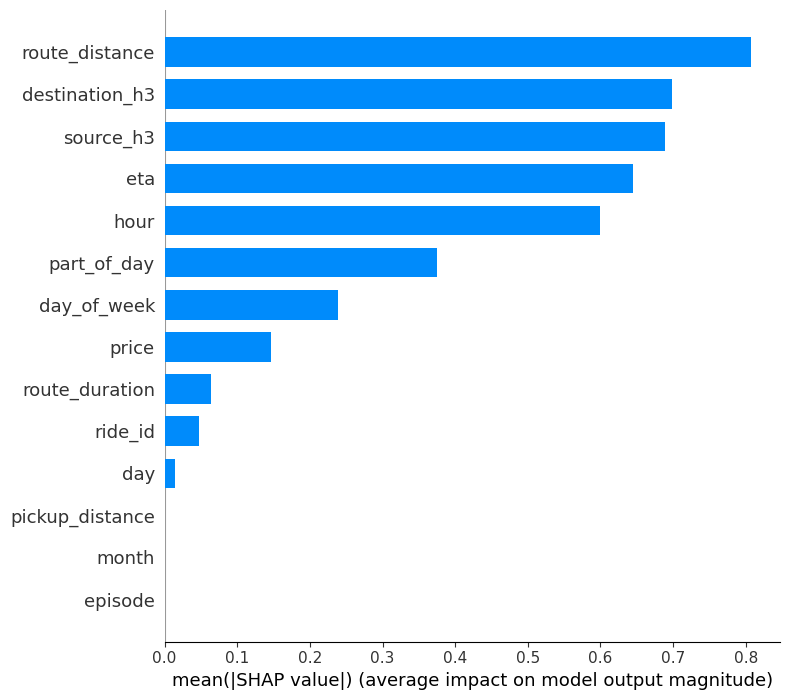

In [20]:
# Ensure all categorical features are properly encoded
categorical_features = ['source_h3', 'destination_h3', 'part_of_day']
for col in categorical_features:
    simulation_data[col] = simulation_data[col].astype('category').cat.codes

# Define features and target
X_sim = simulation_data.drop(columns=['success'])
y_sim = simulation_data['success']

# Split the data
X_train_sim, X_test_sim, y_train_sim, y_test_sim = train_test_split(X_sim, y_sim, test_size=0.2, random_state=42)

# Initialize and train the LightGBM model
lgb_model_sim = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_model_sim.fit(X_train_sim, y_train_sim)

# Predict and evaluate
y_pred_sim = lgb_model_sim.predict(X_test_sim)
print(classification_report(y_test_sim, y_pred_sim))

# Step 5: Use SHAP for Feature Importance
explainer = shap.Explainer(lgb_model_sim)
shap_values = explainer(X_test_sim)

# Plot summary plot
shap.summary_plot(shap_values, X_test_sim, plot_type="bar")
